In [11]:
# This notebook is for tests generation for state visualizer
# if you cannot run this notebook in conda env check this out: https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.agents.agent import (
    SampleAgent,
    GreedyHumanModel,
    RandomAgent,
)
from overcooked_ai_py.mdp.overcooked_mdp import (
    OvercookedGridworld,
    OvercookedState,
    Recipe,
    SoupState,
)
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.visualization.visualization_utils import (
    show_image_in_ipython,
)
from overcooked_ai_py.utils import generate_temporary_file_path
from overcooked_ai_py.static import FONTS_DIR
from overcooked_ai_py.mdp.layout_generator import POT
import copy
import pygame
import os
import numpy as np
import json


def has_cooking_timer(state, grid):
    for obj in state.objects.values():
        if isinstance(obj, SoupState):
            (x_pos, y_pos) = obj.position
            if obj._cooking_tick > 0 and grid[y_pos][x_pos] == POT:
                print("found cooking object", obj)
                return True
    return False


Recipe.configure({})


def display_and_export_to_array(test_dict):
    test_dict = copy.deepcopy(test_dict)
    test_dict["kwargs"]["state"] = OvercookedState.from_dict(
        test_dict["kwargs"]["state"]
    )
    surface = StateVisualizer(**test_dict["config"]).render_state(**test_dict["kwargs"])
    img_path = generate_temporary_file_path("temporary_visualization", extension=".png")
    pygame.image.save(surface, img_path)
    print("check if image is okay")
    show_image_in_ipython(img_path)
    return pygame.surfarray.array3d(surface)


def save_test_files(test_dicts_list, test_result_arrays, json_filename):
    for d, a in zip(test_dicts_list, test_result_arrays):
        with open(d["result_array_filename"], "wb") as f:
            np.save(f, a)
    with open(json_filename, "w") as f:
        json.dump(test_dicts_list, f)


DEFAULT_VALUES = {
    "height": None,  # if None use grid_width - NOTE: can chop down hud if hud is wider than grid
    "width": None,  # if None use (hud_height+grid_height)
    "tile_size": 75,
    "window_fps": 30,
    "player_colors": ["blue", "green"],
    "is_rendering_hud": True,
    "hud_font_size": 10,
    "hud_system_font_name": None,  # if set to None use hud_font_path
    # needs to be overwritten with default - every pc has different pathes "hud_font_path": roboto_path,
    "hud_font_color": (255, 255, 255),  # white
    "hud_data_default_key_order": [
        "all_orders",
        "bonus_orders",
        "time_left",
        "score",
        "potential",
    ],
    "hud_interline_size": 10,
    "hud_margin_bottom": 10,
    "hud_margin_top": 10,
    "hud_margin_left": 10,
    "hud_distance_between_orders": 5,
    "hud_order_size": 15,
    "is_rendering_cooking_timer": True,
    "show_timer_when_cooked": True,
    "cooking_timer_font_size": 20,  # # if set to None use cooking_timer_font_path
    # needs to be overwritten with default - every pc has different pathes "cooking_timer_font_path": roboto_path,
    "cooking_timer_system_font_name": None,
    "cooking_timer_font_color": (255, 0, 0),  # red
    "grid": None,
    "background_color": (155, 101, 0),  # color of empty counter
}

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1.00; : 100%|██████████| 1/1 [00:00<00:00, 901.61it/s]

testing test_hud_1 dict
check if image is okay


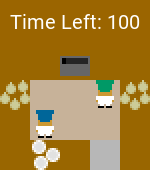

testing test_hud_2 dict
check if image is okay


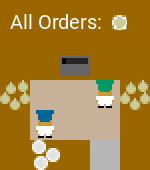

testing test_hud_3 dict
check if image is okay


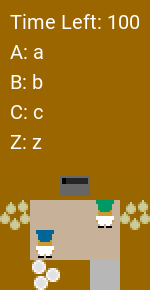

In [12]:
# because of inconsistent display of fonts there is no HUD tests currently used
hud_tests = []
hud_test_results = []

mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room")
agent_eval = AgentEvaluator(env_params={"horizon": 1}, mdp_fn=lambda _: mdp)

trajectory_random_pair = agent_eval.evaluate_random_pair(
    num_games=1, display=False, native_eval=True
)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
state = trajectory_random_pair["ep_states"][0][0]

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["hud_font_size"] = 20
hud_data = {"time_left": 100}
kwargs = {"hud_data": hud_data, "grid": grid, "state": state.to_dict()}

test_hud_1 = {
    "config": config,
    "kwargs": kwargs,
    "comment": "Test simple text in hud. NOTE: failing to render stuff outside HUD also fails this test",
    "result_array_filename": "test_hud_1.npy",
}
print("testing test_hud_1 dict")
test_hud_1_array = display_and_export_to_array(test_hud_1)
hud_tests.append(test_hud_1)
hud_test_results.append(test_hud_1_array)


config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["hud_font_size"] = 20
config["hud_order_size"] = 25
hud_data = {"all_orders": trajectory_random_pair["mdp_params"][0]["start_all_orders"]}
kwargs = {"hud_data": hud_data, "grid": grid, "state": state.to_dict()}
test_hud_2 = {
    "config": config,
    "kwargs": kwargs,
    "comment": "Test simple recipes in hud. NOTE: failing to render stuff outside HUD also fails this test",
    "result_array_filename": "test_hud_2.npy",
}

print("testing test_hud_2 dict")
test_hud_2_array = display_and_export_to_array(test_hud_2)
hud_tests.append(test_hud_2)
hud_test_results.append(test_hud_2_array)

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["hud_font_size"] = 20
hud_data = {"time_left": 100, "a": "a", "b": "b", "c": "c", "z": "z"}
kwargs = {"hud_data": hud_data, "grid": grid, "state": state.to_dict()}
test_hud_3 = {
    "config": config,
    "kwargs": kwargs,
    "comment": "Test chronology of hud based on keys NOTE: failing to render stuff outside HUD also fails this test",
    "result_array_filename": "test_hud_3.npy",
}
print("testing test_hud_3 dict")
test_hud_3_array = display_and_export_to_array(test_hud_3)
hud_tests.append(test_hud_3)
hud_test_results.append(test_hud_3_array)

In [13]:
# if all stuff above is ok run this cell
# because of inconsistent display of fonts there is no HUD tests currently used
save_test_files(hud_tests, hud_test_results, "render_state_data_test_hud.json")

testing test_size_1 dict
check if image is okay


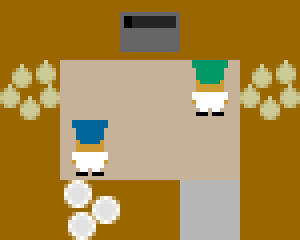

testing test_size_2 dict
check if image is okay


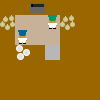

In [14]:
size_tests = []
size_test_results = []
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 60
kwargs = {"hud_data": {}, "grid": grid, "state": state.to_dict()}
test_size_1 = {
    "config": config,
    "kwargs": kwargs,
    "comment": "Test of setting of tile_size (no hud)",
    "result_array_filename": "test_size_1.npy",
}
print("testing test_size_1 dict")
test_size_1_array = display_and_export_to_array(test_size_1)
size_tests.append(test_size_1)
size_test_results.append(test_size_1_array)

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 15
config["height"] = 100
config["width"] = 100
kwargs = {"hud_data": {}, "grid": grid, "state": state.to_dict()}
test_size_2 = {
    "config": config,
    "kwargs": kwargs,
    "comment": "Test of setting of width and height (no hud)",
    "result_array_filename": "test_size_2.npy",
}
print("testing test_size_2 dict")
test_size_2_array = display_and_export_to_array(test_size_2)
size_tests.append(test_size_2)
size_test_results.append(test_size_2_array)

In [15]:
# if all stuff above is ok run this cell
save_test_files(size_tests, size_test_results, "render_state_data_test_sizes.json")

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1000.00; : 100%|██████████| 1/1 [00:00<00:00, 17.30it/s]

found cooking object {øøø1
test_cooking_timer_1 dict
check if image is okay


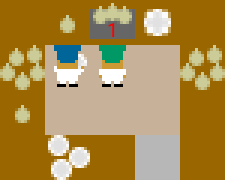

In [16]:
rendered_cooking_timer = False
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45

while not rendered_cooking_timer:
    mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room")
    agent_eval = AgentEvaluator(env_params={"horizon": 1000}, mdp_fn=lambda _: mdp)
    trajectory_random_pair = agent_eval.evaluate_random_pair(
        num_games=1, display=False, native_eval=True
    )
    grid = trajectory_random_pair["mdp_params"][0]["terrain"]
    for state in trajectory_random_pair["ep_states"][0]:
        if not rendered_cooking_timer and has_cooking_timer(state, grid):
            kwargs = {"hud_data": {}, "grid": grid, "state": state.to_dict()}
            test_cooking_timer_1 = {
                "config": config,
                "kwargs": kwargs,
                "comment": "Test of setting rendering cooking timer",
                "result_array_filename": "test_cooking_timer_display_1.npy",
            }
            print("test_cooking_timer_1 dict")
            test_test_cooking_timer_1_array = display_and_export_to_array(
                test_cooking_timer_1
            )
            rendered_cooking_timer = True

In [17]:
# if all stuff above is ok run this cell
save_test_files(
    [test_cooking_timer_1],
    [test_test_cooking_timer_1_array],
    "render_state_data_test_cooking_display.json",
)

  0%|          | 0/1 [00:00<?, ?it/s]

Computing MotionPlanner to be saved in /Users/bram/Documents/Afstuderen/src/overcooked_ai_py/data/planners/cramped_room_tomato_mp.pkl
It took 0.01203465461730957 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

test_various_display_1 dict
check if image is okay


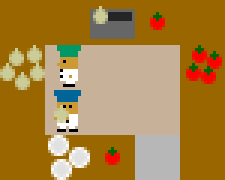

test_various_display_2 dict
check if image is okay


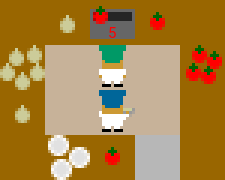

test_various_display_3 dict
check if image is okay


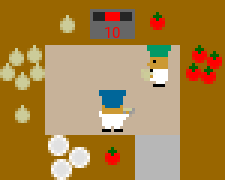

test_various_display_4 dict
check if image is okay


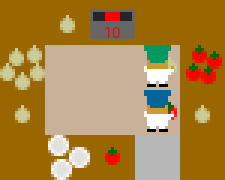

test_various_display_5 dict
check if image is okay


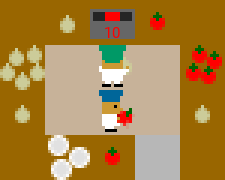

test_various_display_6 dict
check if image is okay


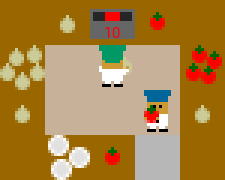

test_various_display_7 dict
check if image is okay


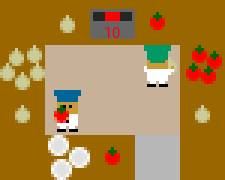

test_various_display_8 dict
check if image is okay


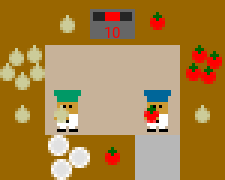

test_various_display_9 dict
check if image is okay


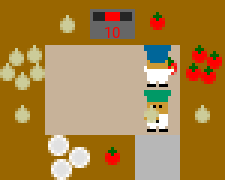

test_various_display_10 dict
check if image is okay


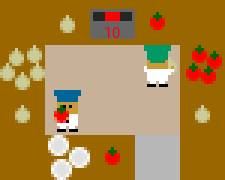

In [18]:
# testing some states hoping it can find unexpected bugs
various_tests = []
various_results = []

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15
mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room_tomato")
agent_eval = AgentEvaluator(env_params={"horizon": 1001}, mdp_fn=lambda _: mdp)
trajectory_random_pair = agent_eval.evaluate_random_pair(
    num_games=1, display=False, native_eval=True
)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i * 100]
    kwargs = {"hud_data": {}, "grid": grid, "state": state.to_dict()}
    test_dict = {
        "config": config,
        "kwargs": kwargs,
        "comment": "Various tests",
        "result_array_filename": "test_various_display_%d.npy" % i,
    }
    print("test_various_display_%i dict" % i)
    test_array = display_and_export_to_array(test_dict)
    various_tests.append(test_dict)
    various_results.append(test_array)

In [19]:
# if all stuff above is ok run this cell
save_test_files(various_tests, various_results, "render_state_data_test_various.json")

  0%|          | 0/1 [00:00<?, ?it/s]

Computing MotionPlanner to be saved in /Users/bram/Documents/Afstuderen/src/overcooked_ai_py/data/planners/XXOXXXX|D     P|D21   X|XX XSDX|XXXXXXX_mp.pkl
It took 0.03354191780090332 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

test_generated_layout_display_1 dict
check if image is okay


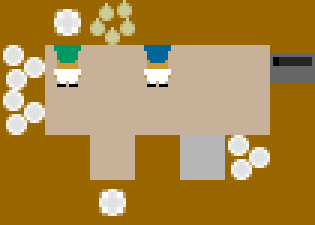

test_generated_layout_display_2 dict
check if image is okay


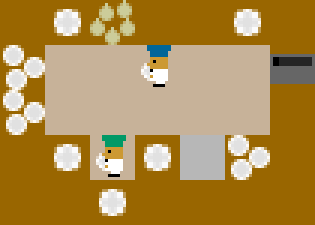

test_generated_layout_display_3 dict
check if image is okay


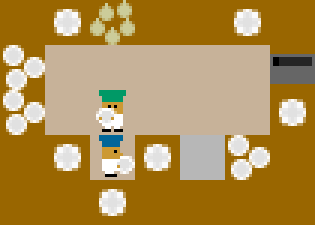

test_generated_layout_display_4 dict
check if image is okay


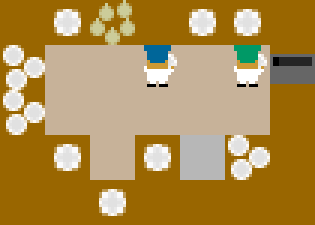

test_generated_layout_display_5 dict
check if image is okay


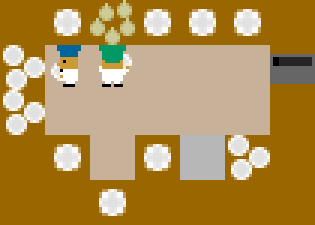

test_generated_layout_display_6 dict
check if image is okay


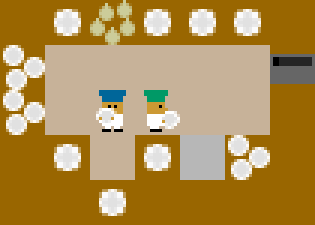

test_generated_layout_display_7 dict
check if image is okay


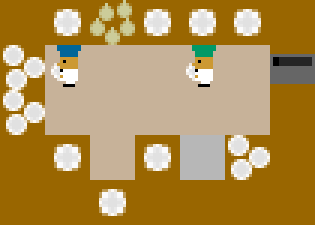

test_generated_layout_display_8 dict
check if image is okay


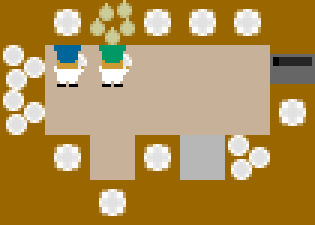

test_generated_layout_display_9 dict
check if image is okay


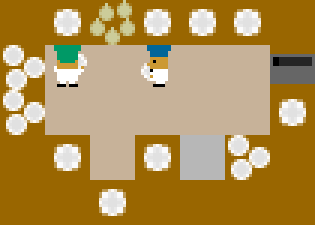

test_generated_layout_display_10 dict
check if image is okay


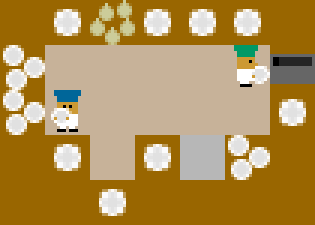

In [20]:
from overcooked_ai_py.mdp.layout_generator import LayoutGenerator

# testing some states hoping it can find unexpected bugs
generated_layout_tests = []
generated_layout_results = []

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15

DEFAULT_MDP_GEN_PARAMS = {
    "inner_shape": (7, 5),
    "prop_empty": 0.7,
    "prop_feats": 0.4,
    "start_all_orders": [{"ingredients": ["onion", "onion", "onion"]}],
    "recipe_values": [20],
    "recipe_times": [20],
    "display": False,
}

mdp_fn = LayoutGenerator.mdp_gen_fn_from_dict(
    DEFAULT_MDP_GEN_PARAMS, outer_shape=(7, 5)
)

agent_eval = AgentEvaluator({"horizon": 1001}, mdp_fn)
trajectory_random_pair = agent_eval.evaluate_random_pair(
    num_games=1, display=False, native_eval=True
)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]
for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i * 100]
    kwargs = {"hud_data": {}, "grid": grid, "state": state.to_dict()}
    test_dict = {
        "config": config,
        "kwargs": kwargs,
        "comment": "Various tests on generated layout",
        "result_array_filename": "test_generated_layout_display_%d.npy" % i,
    }
    print("test_generated_layout_display_%i dict" % i)
    test_array = display_and_export_to_array(test_dict)
    generated_layout_tests.append(test_dict)
    generated_layout_results.append(test_array)

In [21]:
# if all stuff above is ok run this cell
save_test_files(
    generated_layout_tests,
    generated_layout_results,
    "render_state_data_test_generated_layout.json",
)

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

test_action_probs_display_1 dict
check if image is okay


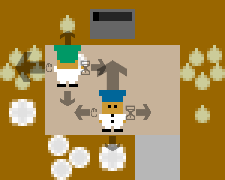

test_action_probs_display_2 dict
check if image is okay


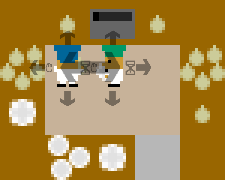

test_action_probs_display_3 dict
check if image is okay


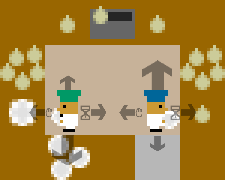

test_action_probs_display_4 dict
check if image is okay


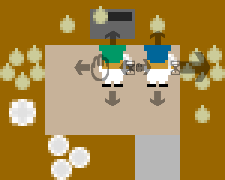

test_action_probs_display_5 dict
check if image is okay


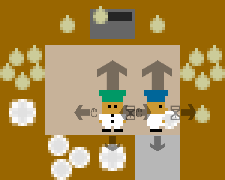

test_action_probs_display_6 dict
check if image is okay


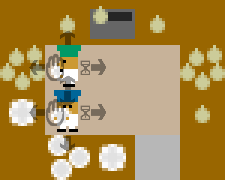

test_action_probs_display_7 dict
check if image is okay


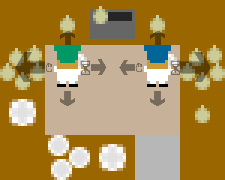

test_action_probs_display_8 dict
check if image is okay


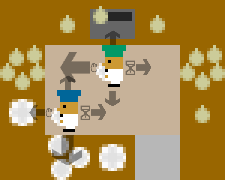

test_action_probs_display_9 dict
check if image is okay


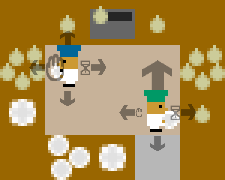

test_action_probs_display_10 dict
check if image is okay


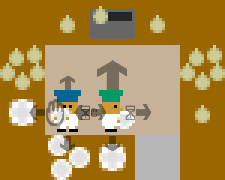

In [22]:
action_probs_tests = []
action_probs_results = []
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15
mdp = OvercookedGridworld.from_layout_name(layout_name="cramped_room")
agent_eval = AgentEvaluator(env_params={"horizon": 1001}, mdp_fn=lambda _: mdp)
trajectory_random_pair = agent_eval.evaluate_random_pair(
    num_games=1, display=False, native_eval=True
)
grid = trajectory_random_pair["mdp_params"][0]["terrain"]

agent1 = SampleAgent(
    [
        GreedyHumanModel(mlam=agent_eval.env.mlam),
        RandomAgent(all_actions=True),
        RandomAgent(all_actions=False),
    ]
)
agent1.agents[0].set_agent_index(0)
agent2 = SampleAgent(
    [
        GreedyHumanModel(mlam=agent_eval.env.mlam),
        RandomAgent(all_actions=True),
        RandomAgent(all_actions=False),
    ]
)
agent2.agents[0].set_agent_index(1)

for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i * 100]
    action_probs = [
        list(agent1.action(state)[1]["action_probs"]),
        list(agent2.action(state)[1]["action_probs"]),
    ]
    kwargs = {
        "hud_data": {},
        "grid": grid,
        "state": state.to_dict(),
        "action_probs": action_probs,
    }
    test_dict = {
        "config": config,
        "kwargs": kwargs,
        "comment": "Action probs tests",
        "result_array_filename": "test_action_probs_display_%d.npy" % i,
    }
    print("test_action_probs_display_%i dict" % i)
    test_array = display_and_export_to_array(test_dict)
    action_probs_tests.append(test_dict)
    action_probs_results.append(test_array)

In [24]:
# if all stuff above is ok run this cell
save_test_files(
    action_probs_tests,
    action_probs_results,
    "render_state_data_test_action_probs_display.json",
)